In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_trajectories(df, column, discrete=True, cmap='magma', n_actions=5, n_intervals=11, n_epochs_per_interval=100, figsize=10,  max_length=300):
    breaks = [int(x) for x in np.linspace(0, len(df), n_intervals)]
    prev_end = 0
    vmin = np.min(np.min(df[column]))
    vmax = np.max(np.max(df[column]))
    for i, bound in enumerate(breaks[1:]):
        data = df[column][prev_end:prev_end+n_epochs_per_interval]
        padded = []
        for d in data:
            to_append = d + [np.nan] * (max_length - len(d))
            padded.append(d + [np.nan] * (max_length - len(d)))
        if discrete:
            cmap = cmap_discretize(cmap, n_actions)
        fig = plt.figure(figsize=(figsize,figsize/2))
        plot = plt.imshow(padded, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.colorbar()  
        fig.suptitle('epoch {}:{}'.format(prev_end, prev_end+n_epochs_per_interval), fontsize=20)   
        prev_end = bound
        
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    cmap: colormap instance, eg. cm.jet. 
         N: number of colors.     
     Example
     x = resize(arange(100), (5,100))
     djet = cmap_discretize(cm.jet, 5)
     imshow(x, cmap=djet)
     """
    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [(indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in np.arange(N+1)]
        # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [3]:
def load_episode_data(directory):
    files = [f for f in os.listdir(directory) if os.path.isfile(directory+f)]
    episode_data = pd.DataFrame()
    for f in files:
        try:
            new_data = pd.read_pickle(directory+f)
        except:
            print(f)
        episode_data = episode_data.append(new_data, ignore_index=True)
    episode_data = episode_data.sort_values('episode')
    episode_data = episode_data.reset_index(drop=True)
    episode_data.episode = [int(x) for x in episode_data.episode]
#     episode_data = episode_data[['episode', 'action', 'reward', 'state', 'logprob', 'mask']]
    return episode_data

In [4]:
def unpack_env_data(df):
    keys = list(df.env_data)[0][0].keys()
    for k in keys:
        df[k] = [[x[k] for x in y] for y in df.env_data]
    return df

In [5]:
summary = pd.read_pickle('../experiments/ppo_ppo_lightbot_cross/summary.p')

In [9]:
ed = load_episode_data('../experiments/ppo_ppo_lightbot_cross/episodes/')

In [10]:
ed = unpack_env_data(ed)

In [11]:
ed.head()

,action,env_data,episode,logprob,mask,reward,state,coords,direction
0,"[[0], [0], [2], [1], [1], [2], [1], [3], [3], ...","[{'coords': [1, 3], 'direction': 1}, {'coords'...",1,"[[-1.6094379425048828], [-1.6094379425048828],...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[[[2.0, 5.0, 0.0], [2.0, 5.0, 0.0], [2.0, 5.0...","[[1, 3], [1, 3], [1, 3], [1, 4], [1, 4], [1, 4...","[1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 3, 0, 1, ..."
1,"[[1], [2], [0], [3], [1], [0], [0], [2], [0], ...","[{'coords': [5, 5], 'direction': 3}, {'coords'...",2,"[[-1.6094379425048828], [-1.6094379425048828],...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[[[2.0, 5.0, 0.0], [2.0, 5.0, 0.0], [1.0, 0.0...","[[5, 5], [5, 5], [5, 4], [5, 4], [5, 4], [5, 4...","[3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
2,"[[4], [4], [2], [3], [1], [2], [3], [0], [1], ...","[{'coords': [3, 5], 'direction': 2}, {'coords'...",3,"[[-1.6094379425048828], [-1.6094379425048828],...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[[[2.0, 5.0, 0.0], [2.0, 5.0, 0.0], [2.0, 5.0...","[[3, 5], [3, 5], [3, 5], [4, 5], [4, 5], [4, 5...","[2, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 2, 3, ..."
3,"[[4], [4], [2], [2], [0], [0], [1], [0], [1], ...","[{'coords': [5, 4], 'direction': 2}, {'coords'...",4,"[[-1.6094379425048828], [-1.6094379425048828],...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[[[2.0, 5.0, 0.0], [2.0, 5.0, 0.0], [2.0, 5.0...","[[5, 4], [5, 4], [5, 4], [5, 4], [5, 4], [5, 4...","[2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
4,"[[1], [3], [2], [2], [4], [3], [4], [2], [1], ...","[{'coords': [5, 4], 'direction': 1}, {'coords'...",5,"[[-1.6094379425048828], [-1.6094379425048828],...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[[[[2.0, 5.0, 0.0], [2.0, 5.0, 0.0], [2.0, 5.0...","[[5, 4], [5, 4], [5, 4], [4, 4], [3, 4], [3, 4...","[1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0, 3, 3, ..."


In [16]:
l = ed.action[0]

In [ ]:
[]

In [26]:
for i, x in enumerate(ed.action):
    ed.action[i] = [y[0] for y in x]

/home/sanborn/software/anaconda3/envs/deeprl/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
idxs = [i for i,c in enumerate(ed.action) if len(c) < 100]

In [42]:
np.sum(ed.reward[1360])

43.0

In [94]:
import pickle
with open('../experiments/ppo3_rlgamma_99_ppo_lightbot_cross/config.p', 'rb') as f:
    config = pickle.load(f)

In [97]:
config.training.lr_gamma

0.9

In [31]:
ed.loc[200]

action       [1, 2, 4, 2, 4, 2, 0, 2, 3, 3, 1, 0, 4, 4, 2, ...
env_data     [{'coords': [4, 5], 'direction': 3}, {'coords'...
episode                                                    300
logprob      [[-1.6094379425048828], [-1.6094379425048828],...
mask         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
reward       [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....
state        [[[[2.0, 5.0, 0.0], [2.0, 5.0, 0.0], [1.0, 0.0...
coords       [[4, 5], [4, 5], [4, 4], [4, 4], [3, 4], [3, 4...
direction    [3, 3, 3, 2, 2, 1, 1, 1, 1, 2, 3, 3, 3, 2, 1, ...
Name: 200, dtype: object

In [34]:
ed.loc[0]

action       [0, 0, 2, 1, 1, 2, 1, 3, 3, 0, 4, 3, 3, 3, 1, ...
env_data     [{'coords': [1, 3], 'direction': 1}, {'coords'...
episode                                                      1
logprob      [[-1.6094379425048828], [-1.6094379425048828],...
mask         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
reward       [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....
state        [[[[2.0, 5.0, 0.0], [2.0, 5.0, 0.0], [2.0, 5.0...
coords       [[1, 3], [1, 3], [1, 3], [1, 4], [1, 4], [1, 4...
direction    [1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 3, 0, 1, ...
Name: 0, dtype: object

In [53]:
[np.array(x).shape for x in ed.state[0]]

[(7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3),
 (7, 7, 3)]

In [ ]:
np.transpose(np.array(ed.state[0][0], )

In [68]:
img = np.array(ed.state[0][0])

In [63]:
img.shape

(7, 7, 3)

In [85]:
img = np.sum(np.array(ed.state[0][0]),axis=2)

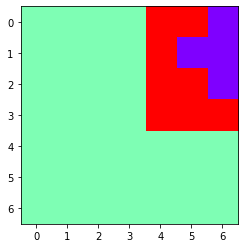

In [88]:
plt.imshow(img, cmap='rainbow_r')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


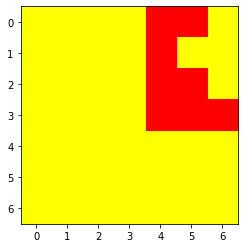

In [74]:
plt.imshow(np.array(ed.state[0][2]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


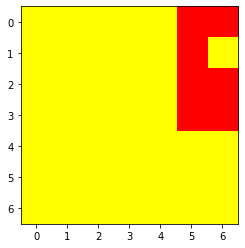

In [75]:
plt.imshow(np.array(ed.state[0][3]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


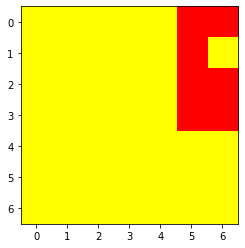

In [76]:
plt.imshow(np.array(ed.state[0][4]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


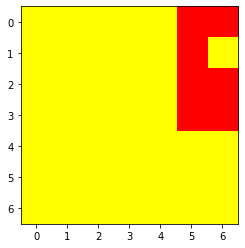

In [77]:
plt.imshow(np.array(ed.state[0][4]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


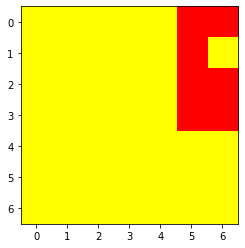

In [78]:
plt.imshow(np.array(ed.state[0][5]))

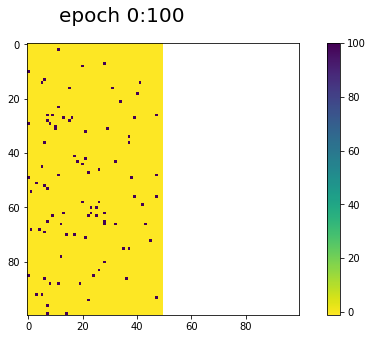

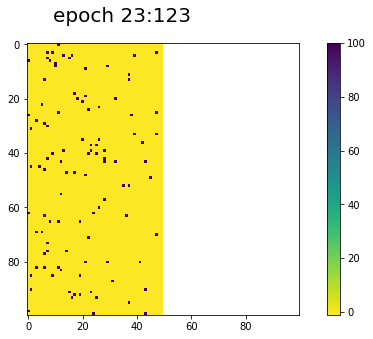

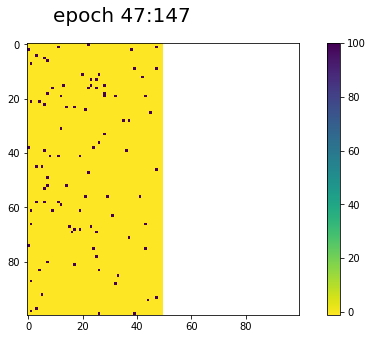

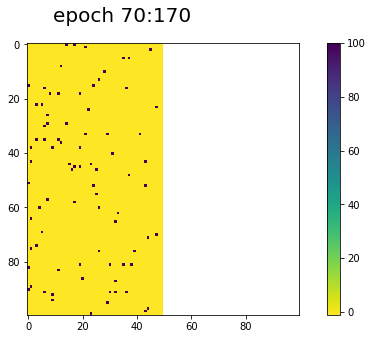

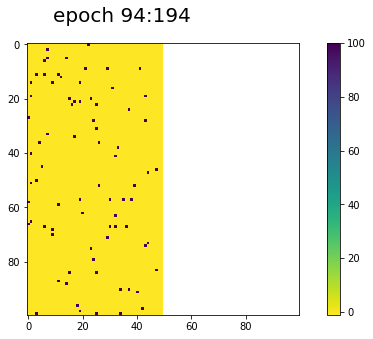

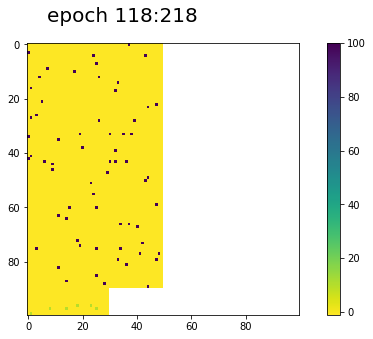

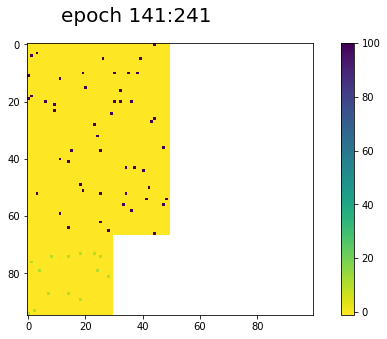

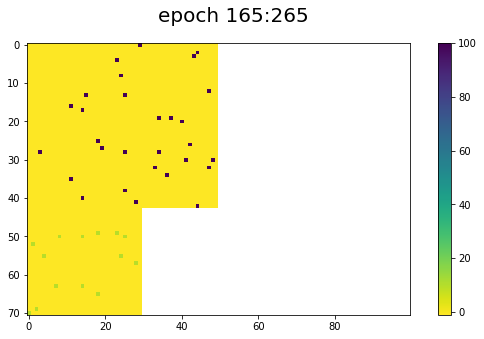

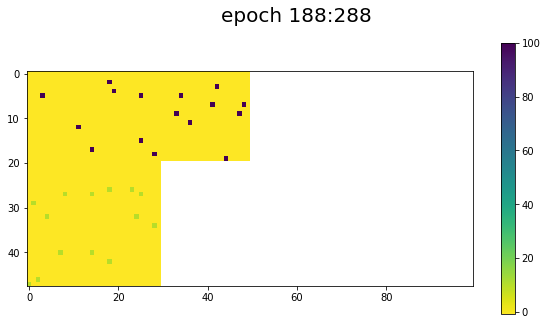

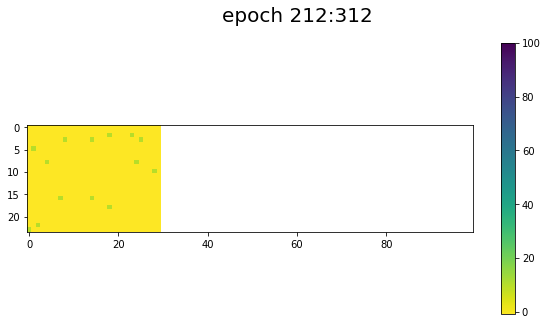

In [33]:
plot_trajectories(ed, 'reward', n_actions=5, discrete=False, cmap='viridis_r', max_length=100)

In [24]:
summary = pd.read_pickle('../experiments/ppoc_fourrooms_minibatch/summary.p')

In [25]:
summary

,episode,running_moves,running_rewards
0,1.0,55.000000,46.000000
1,2.0,55.360000,45.640000
2,3.0,56.216400,44.783600
3,4.0,58.654236,41.335764
4,5.0,61.067694,37.922406
5,6.0,63.457017,34.543182
6,7.0,63.072447,34.957750
7,8.0,65.001722,33.058173
8,9.0,67.351705,29.727591
9,10.0,68.798188,28.320315
